[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


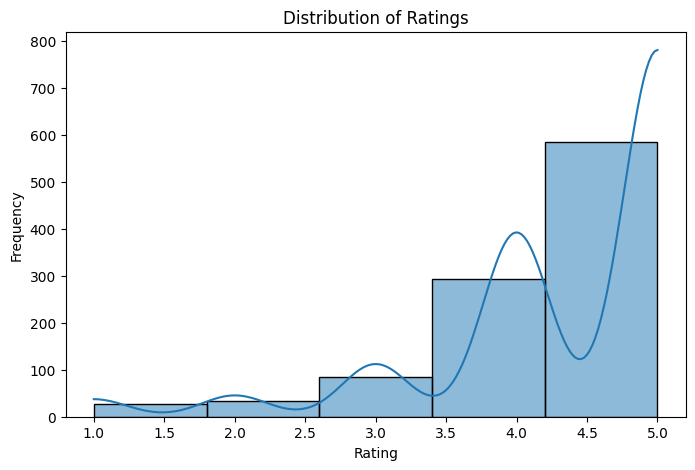

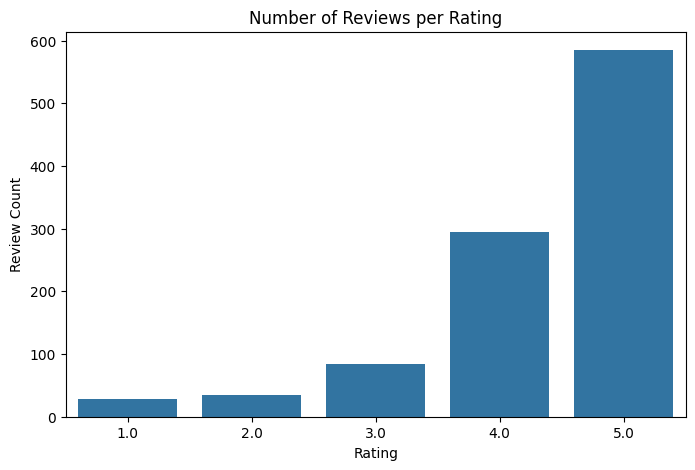

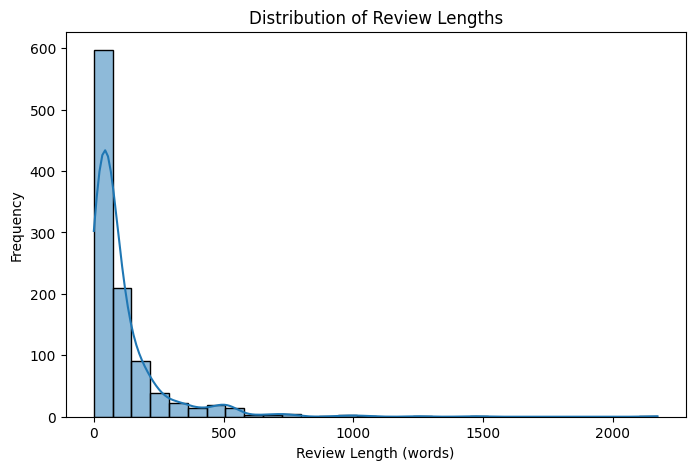

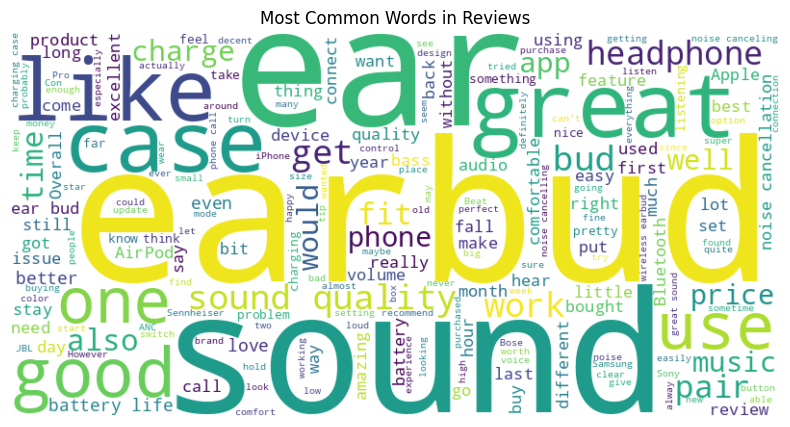

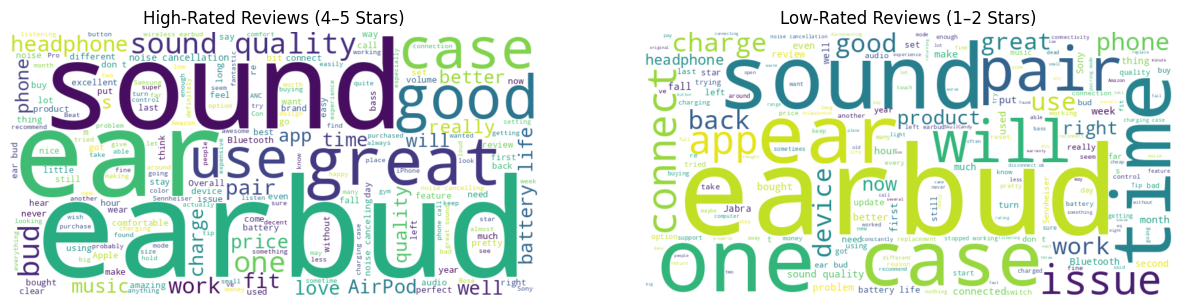

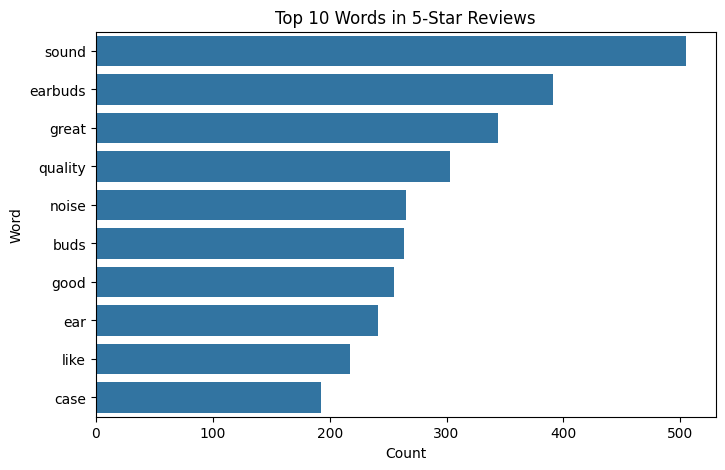

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("punkt_tab")

df = pd.read_csv("earbuds_reviews_prepared_for_analysis.csv")

# -----------------------------
# Rating Distribution
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["rating"], bins=5, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# -----------------------------
# Review Count by Rating
# -----------------------------
rating_counts = df["rating"].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Review Count")
plt.show()

# -----------------------------
# Review Length Distribution
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["review_length"], bins=30, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (words)")
plt.ylabel("Frequency")
plt.show()

# -----------------------------
# Word Cloud – All Reviews
# -----------------------------
text = " ".join(df["content"].dropna().astype(str))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=set(stopwords.words("english"))
).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()

# -----------------------------
# Word Clouds by Rating Group
# -----------------------------
high_rated = " ".join(df[df["rating"] >= 4]["content"].dropna().astype(str))
low_rated = " ".join(df[df["rating"] <= 2]["content"].dropna().astype(str))

high_wc = WordCloud(width=800, height=400, background_color="white").generate(high_rated)
low_wc = WordCloud(width=800, height=400, background_color="white").generate(low_rated)

fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].imshow(high_wc, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("High-Rated Reviews (4–5 Stars)")

axes[1].imshow(low_wc, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Low-Rated Reviews (1–2 Stars)")

plt.show()

# -----------------------------
# Top Words in 5-Star Reviews
# -----------------------------
five_star_text = " ".join(
    df[df["rating"] == 5]["content"].dropna().astype(str)
).lower()

tokens = word_tokenize(five_star_text)

stop_words = set(stopwords.words("english"))
tokens = [w for w in tokens if w.isalpha() and w not in stop_words]

common_words = Counter(tokens).most_common(10)
common_df = pd.DataFrame(common_words, columns=["Word", "Count"])

plt.figure(figsize=(8,5))
sns.barplot(x="Count", y="Word", data=common_df)
plt.title("Top 10 Words in 5-Star Reviews")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()